In [1]:
from a2_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

0.9999999974


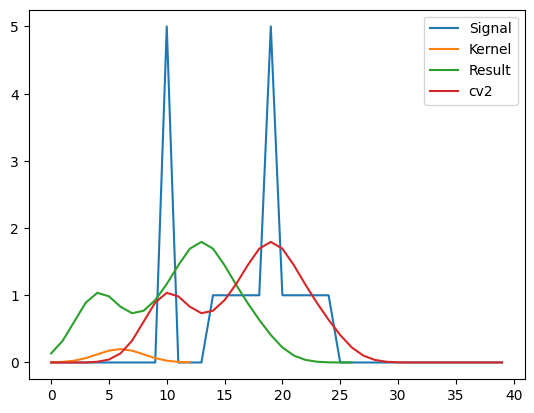

In [2]:
# (b) Implement the function simple_convolution that uses a 1-D signal I and a kernel k of size 2N + 1.
# The function should return the convolution between the two.


def simple_convolution(signal, kernel):
    result = []
    N = int((len(kernel) - 1) / 2)
    for i in range(N, len(signal) - N - 1):
        result_i = sum([kernel[j] * signal[i - j + N]
                        for j in range(len(kernel))])
        result.append(result_i)
    return result


signal = read_data('signal.txt')
kernel = read_data('kernel.txt')
print(sum(kernel))
result = simple_convolution(signal, kernel)
cv2_result = cv2.filter2D(signal, -1, kernel)
plt.plot(signal, label='Signal')
plt.plot(kernel, label='Kernel')
plt.plot(result, label='Result')
plt.plot(cv2_result, label='cv2')
plt.legend()
plt.show()

# Question: Can you recognize the shape of the kernel?
# What is the sum of the elements in the kernel? How does the kernel affect the signal?
# Gaussian kernel, 0.999, the kernel smoothes the signal

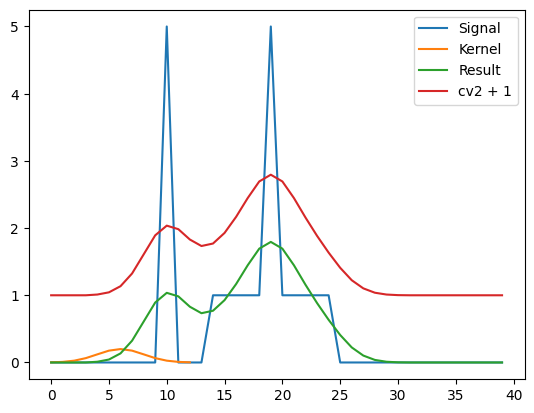

In [3]:
# (c) Improve the function simple_convolution by also addressing the edges of the signal.

def improved_simple_convolution(signal, kernel):
    result = []
    N = int((len(kernel) - 1) / 2)
    for i in range(len(signal)):
        result_i = 0
        for j in range(len(kernel)):
            idx_signal = i - j + N
            if idx_signal < 0 or idx_signal >= len(signal):
                signal_value = 0
            else:
                signal_value = signal[idx_signal]
            result_i += kernel[j] * signal_value

        result.append(result_i)
    return result


result_improved = improved_simple_convolution(signal, kernel)
plt.plot(signal, label='Signal')
plt.plot(kernel, label='Kernel')
plt.plot(result_improved, label='Result')
plt.plot(cv2_result + 1, label='cv2 + 1')
plt.legend()
plt.show()

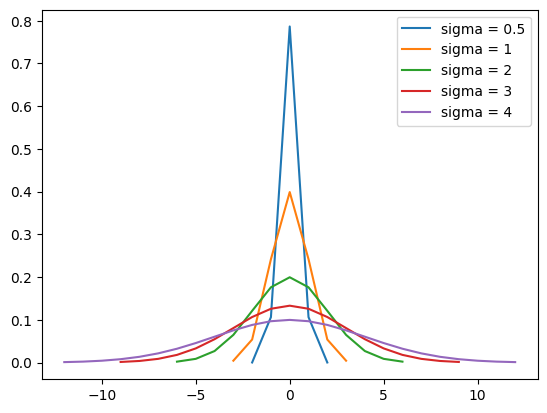

In [4]:
# (d) Write a function gauss(sigma) that calculates a Gaussian kernel.


def gauss(sigma):
    gauss_kernel = []
    for x in range(math.floor(- 3 * sigma), math.ceil(3 * sigma) + 1):
        result_x = (1 / (math.sqrt(2 * math.pi) * sigma)) * \
            math.exp(-((x ** 2) / (2 * (sigma ** 2))))
        gauss_kernel.append(result_x)
    return np.array(gauss_kernel) / sum(gauss_kernel)


gauss_kernel_0_5 = gauss(0.5)
gauss_kernel_1 = gauss(1)
gauss_kernel_2 = gauss(2)
gauss_kernel_3 = gauss(3)
gauss_kernel_4 = gauss(4)
plt.plot(np.arange(math.floor(- 3 * 0.5), math.ceil(3 * 0.5) + 1),
         gauss_kernel_0_5, label='sigma = 0.5')
plt.plot(np.arange(math.floor(- 3 * 1), math.ceil(3 * 1) + 1),
         gauss_kernel_1, label='sigma = 1')
plt.plot(np.arange(math.floor(- 3 * 2), math.ceil(3 * 2) + 1),
         gauss_kernel_2, label='sigma = 2')
plt.plot(np.arange(math.floor(- 3 * 3), math.ceil(3 * 3) + 1),
         gauss_kernel_3, label='sigma = 3')
plt.plot(np.arange(math.floor(- 3 * 4), math.ceil(3 * 4) + 1),
         gauss_kernel_4, label='sigma = 4')
plt.legend()
plt.show()

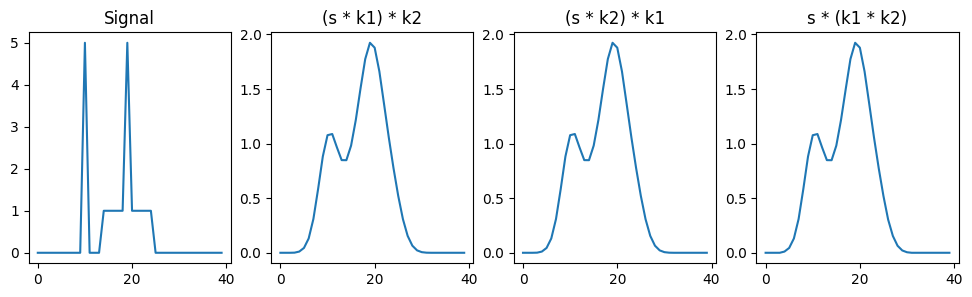

In [5]:
# (e) The main advantage of convolution in comparison to correlation is the associativity of operations.
# This allows us to pre-calculate multiple kernels that we want to use on an image.
# Test this property by loading the signal from signal.txt and then performing two consecutive convolutions on it
k1 = gauss(2)
k2 = [0.1, 0.6, 0.4]
k3 = improved_simple_convolution(k1, k2)
convolution_k1_k2 = improved_simple_convolution(signal, k1)
convolution_k1_k2 = improved_simple_convolution(convolution_k1_k2, k2)

convolution_k2_k1 = improved_simple_convolution(signal, k2)
convolution_k2_k1 = improved_simple_convolution(convolution_k2_k1, k1)

convolution_k3 = improved_simple_convolution(signal, k3)

plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.plot(signal)
plt.title('Signal')
plt.subplot(1, 4, 2)
plt.plot(convolution_k1_k2)
plt.title('(s * k1) * k2')
plt.subplot(1, 4, 3)
plt.plot(convolution_k2_k1)
plt.title('(s * k2) * k1')
plt.subplot(1, 4, 4)
plt.plot(convolution_k3)
plt.title('s * (k1 * k2)')
plt.show()